# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [14]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

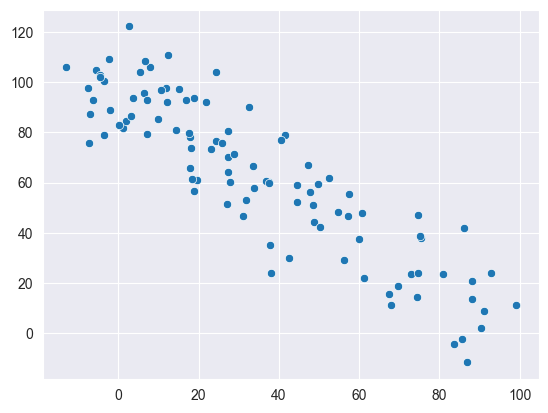

In [15]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [16]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

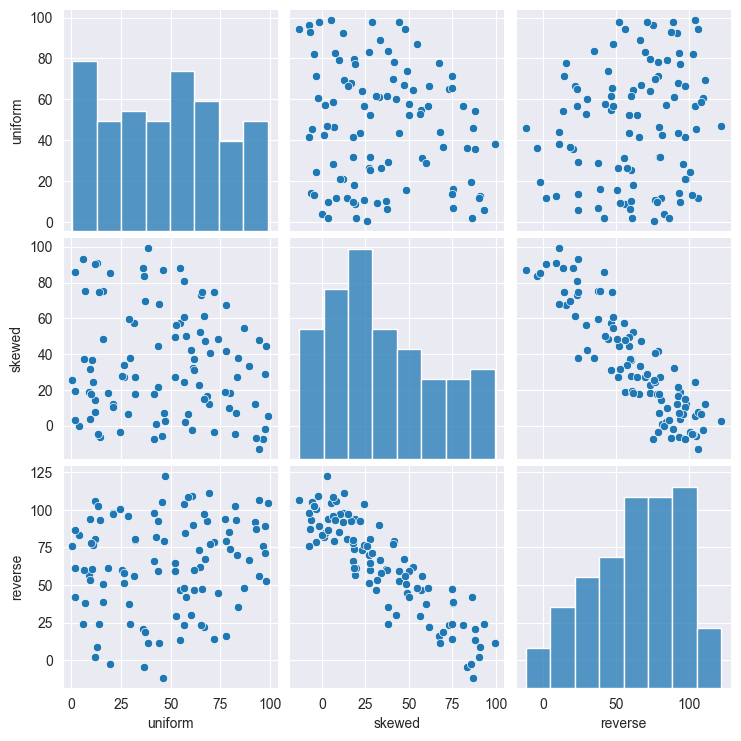

In [17]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [18]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [19]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

<Axes: xlabel='None'>

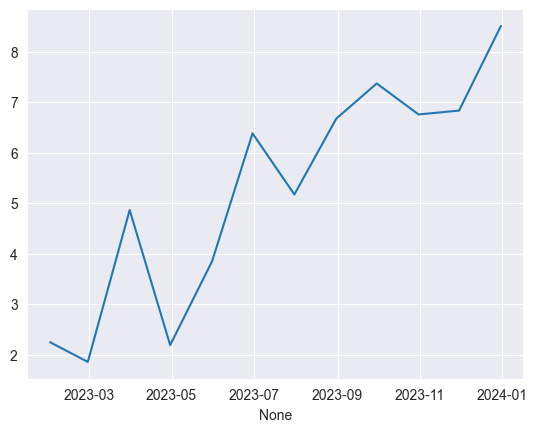

In [20]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

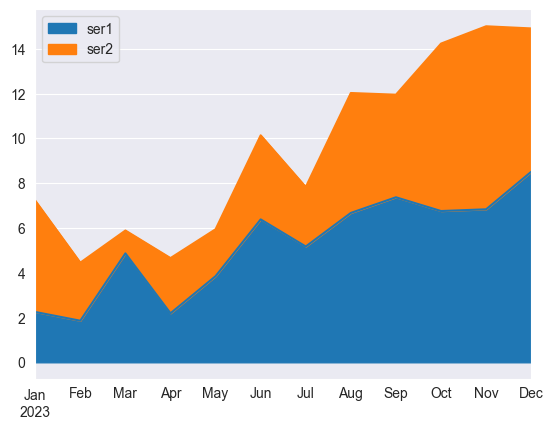

In [21]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

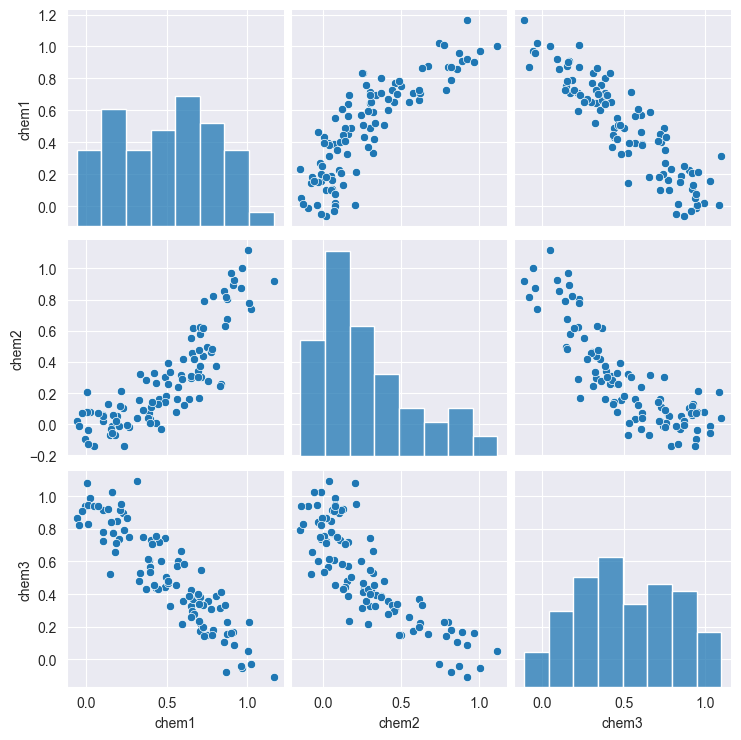

In [23]:
sns.pairplot(df_chem)

### If you had to choose just three of the nine graphs in the pair plot to display, which would you choose?

If I had to choose just three of the nine graphs, I'd choose the scatter plots with these relationships: chem1 vs chem2, chem1 vs chem3, and chem2 vs chem3. The reason is, the histograms just show the chemicals in isolation only. Whereas the scatter plots show the actual relationships between the different chemicals. This shows how they interact with each other in the water sample. By picking these three, we are able to see the relationship between all the different chemicals instead of just in pure isolation. Going further chem1 vs chem2 shows a quadratic curved pattern. The curve starts slowly and accelerates upward. Chem1 vs chem3 shows a linear relationship. Finally chem2 vs chem3 is a strong negative curve meaning as one increases, the other decreases.

### How would you alter the way these graphs are displayed to make them clearer or more informative?

I would add some visual tweaks to make these graphs more clear and informative. First I would add regression lines that include confidence intervals to the scatter plots. This would show that we are less certain about the wider bands of data and more certain about the tighter bands of data that support the relationship. I would use transparency so that the data points don't overlap and you can clearly see how many there are. Right now it is hard to tell. The way the graph is currently, crowded areas could appear as single data points. Building on this, I would add density-based coloring to show that points in higher concentrated areas are red and points in lower concentrated areas are a softer color like blue. So it's much easier to visually see the different density areas. I would add the correlation coefficient and r^2 value on the graph. This way viewers can see the relationship strength without having to infer anything. Furthermore, gridlines would be a great addition so you can get a more exact sense of the values. Also the measurement labels are missing. We don't know if it's mg/L as an example. Finally I'd increase the bin size on the histograms and add a trend line to easily see the shape of each histogram graph.

### Would you fit any of these graphs to a line or curve? Why or why not?

I would fit lines or curves to the scatter plots, but not the histograms. By fitting lines to the scatter plots, it will help show the relationships between the chemicals. For example, if you look at chem1 vs chem2, it's clearly a curved pattern. If you fit a quadratic curve, it would show that when chem2 increases, chem1 increases as well for the increasing portion of the curve. The rate of change isn't constant like a linear relationship. Chem1 vs chem3 shows a strong negative linear relationship. By fitting this relationship to a line it would clearly show how when one increases, the other decreases at the same rate. Chem2 vs chem3 shows a curved negative relationship. This would benefit from a polynomial fit. By adding fitted lines, it would help us understand the relationship between the chemicals better and determine the nature of these relationships. I wouldn't fit lines or curves to the histograms since it just shows the frequency of each chemical compared to the actual relationships.

### What if you had to choose just one?

If I had to pick just one graph, I'd pick the chem1 vs chem2 scatter plot. The reason is, it shows a very interesting relationship being a quadratic curve. It shows a nonlinear interaction between the two chemicals. You can immediately see that when chem1 changes by a small amount this results in a large change in chem2. It's an exponential relationship that could mean that these two chemicals might be involved in a reaction where one catalyzes the other. Even though linear relationships are important, like with chem1 vs chem3, the quadratic relationships shows that a chemical reaction might be happening.

### What if you had to choose six?

If I had to choose six graphs, I'd pick the three normal scatter plots (not inverse) and the three histograms. There is no reason to pick the inverse scatter plots since it's just swapping the x and y axes. By choosing the scatter plots and histograms, we get a complete picture of the individual frequency of each chemical and the relationships between them. The scatter plots show key relationships. Chem1 vs chem2 is a quadratic relationship where chem2 accelerates as chem1 increases. Chem1 vs chem3 shows a strong negative relationship. Chem2 vs chem3 shows a curved relationship. These show how the different chemicals interact with each other. The histograms add context about each of the chemical's distributions. The histogram for chem1 shows a somewhat normal distribution. It has a slight skew to the right, but the data is fairly centered around the middle range. Overall it's a healthy distribution. The histogram for chem2 shows a strong right skew. Most of the data is concentrated on the left with a tail that extends to the right. The histogram for chem3 is pretty uniform with a few peaks at either end. It's almost like a bimodal pattern. Since chem3 = 1 - base_data + noise, it's pretty much an inverted version of the base_data. Overall these 6 choices give us a well-balanced analysis of the chemicals.

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

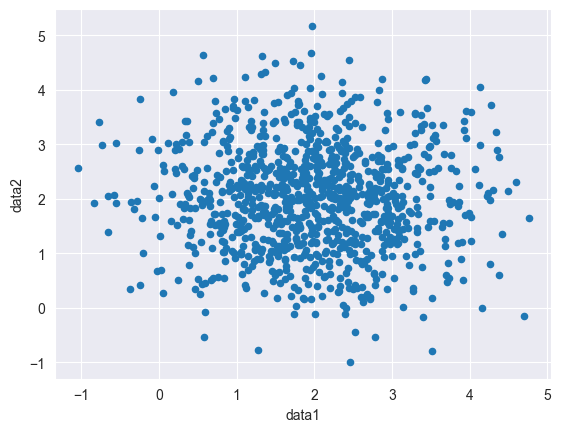

In [24]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

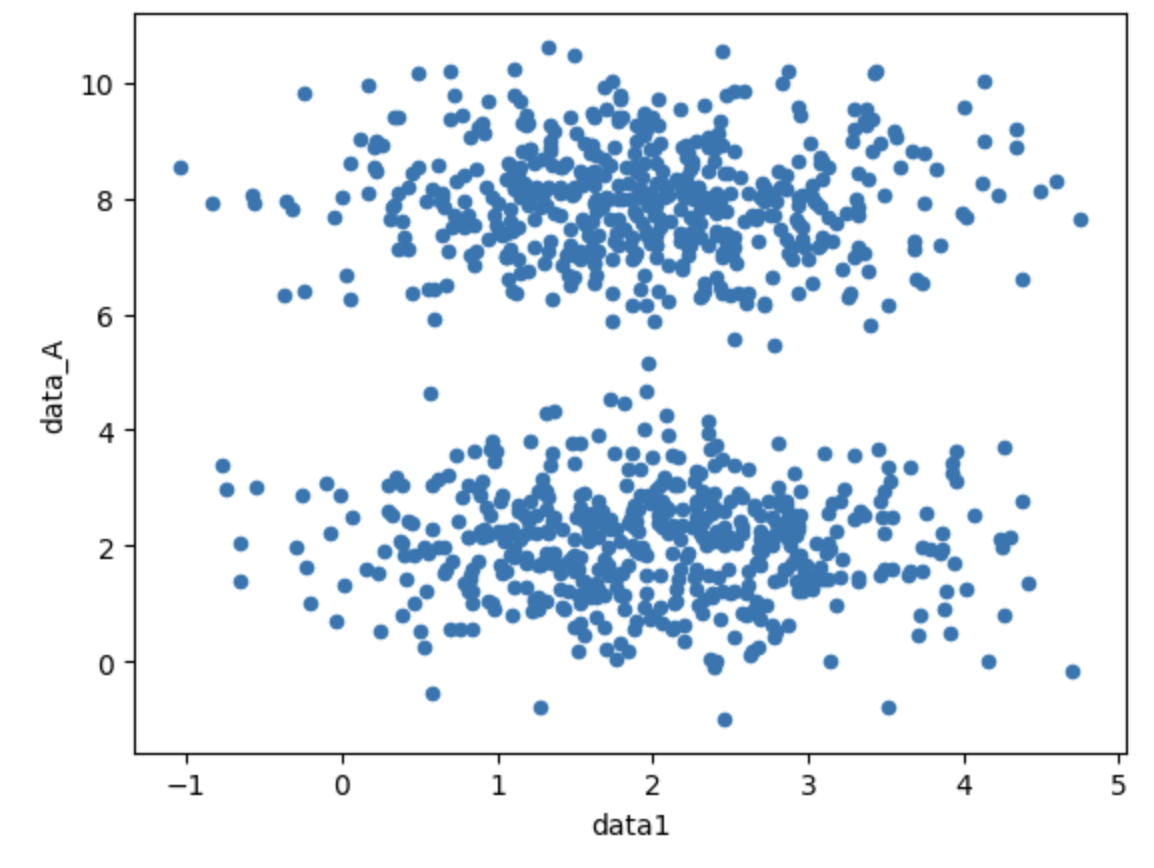

In [26]:
from IPython.display import Image
Image("twoclouds.png")

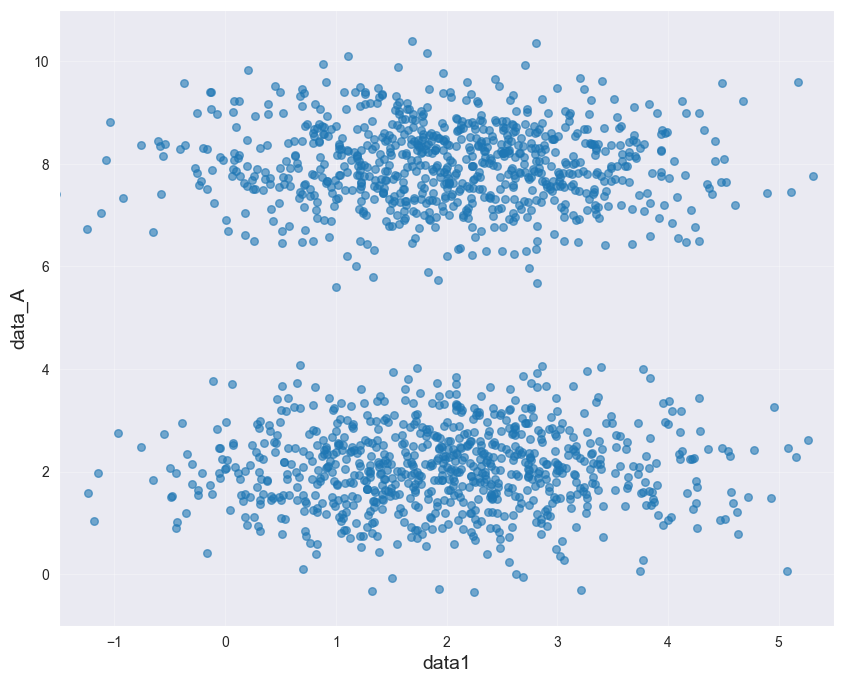

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_points_lower = 800
x_lower = np.random.normal(2, 1.2, n_points_lower)
y_lower = np.random.normal(2, 0.8, n_points_lower)

n_points_upper = 800
x_upper = np.random.normal(2, 1.2, n_points_upper)
y_upper = np.random.normal(8, 0.8, n_points_upper)

data1 = np.concatenate([x_lower, x_upper])
data_A = np.concatenate([y_lower, y_upper])

plt.figure(figsize=(10, 8))
plt.scatter(data1, data_A, alpha=0.6, s=30)
plt.xlabel('data1', fontsize=14)
plt.ylabel('data_A', fontsize=14)
plt.xlim(-1.5, 5.5)
plt.ylim(-1, 11)
plt.grid(True, alpha=0.3)
plt.show()

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

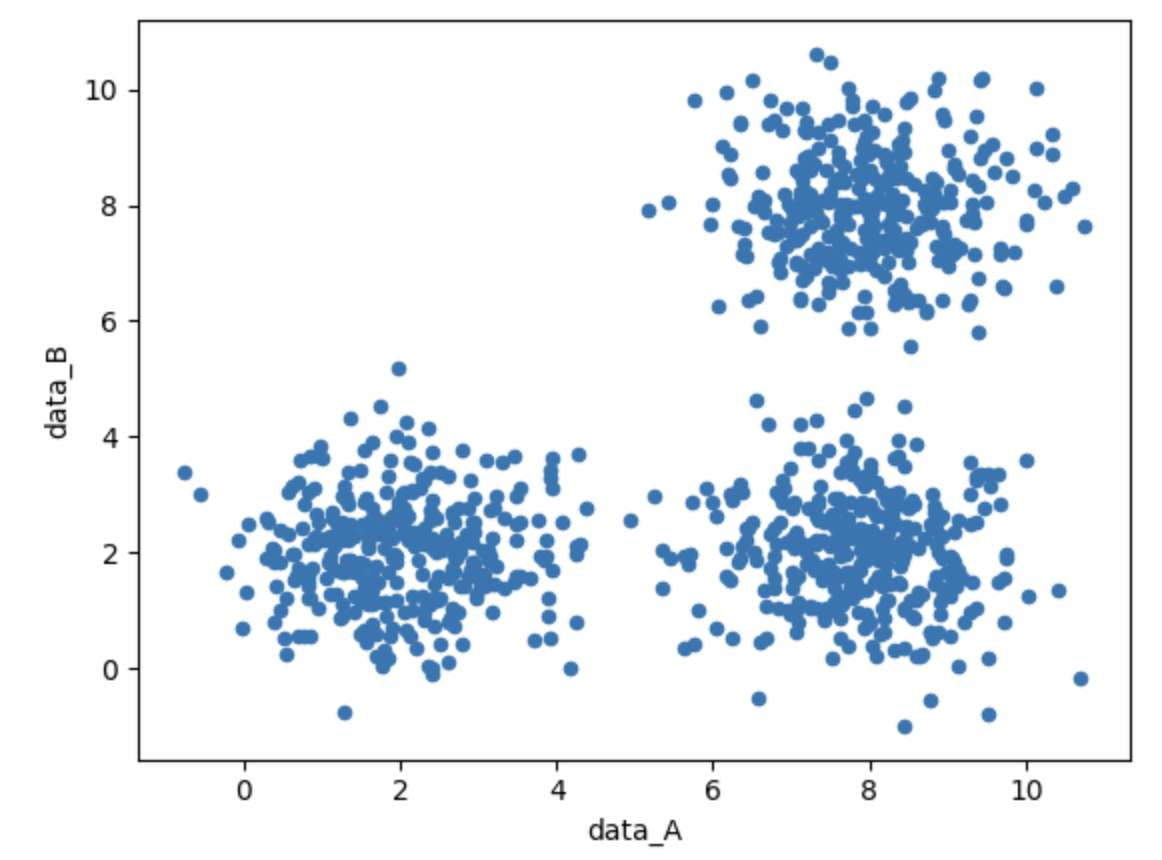

In [2]:
from IPython.display import Image
Image("threeclouds.png")

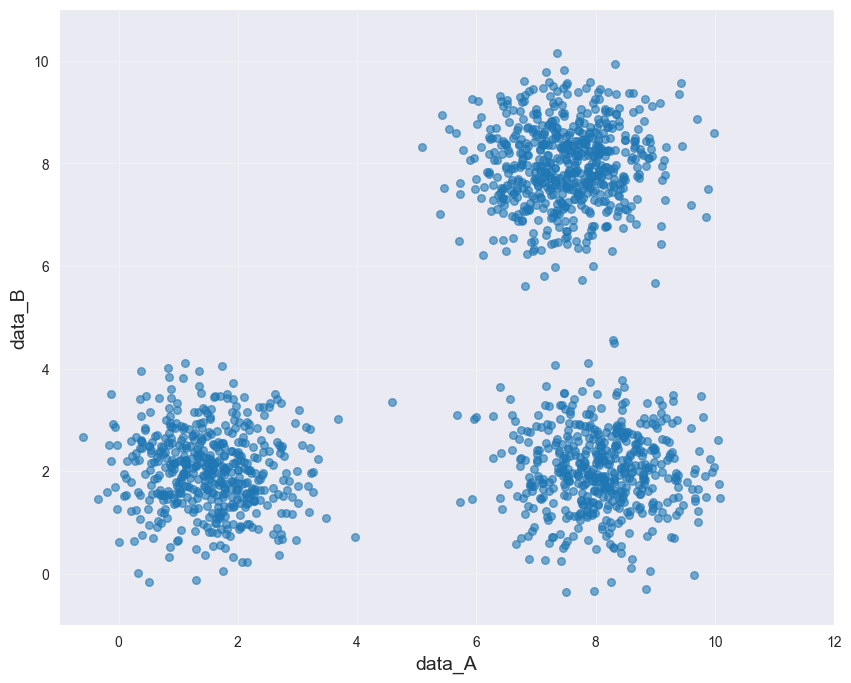

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_points_bottom_left = 500
x_bottom_left = np.random.normal(1.5, 0.8, n_points_bottom_left)
y_bottom_left = np.random.normal(2, 0.8, n_points_bottom_left)

n_points_bottom_right = 500
x_bottom_right = np.random.normal(8, 0.8, n_points_bottom_right)
y_bottom_right = np.random.normal(2, 0.8, n_points_bottom_right)

n_points_top = 600
x_top = np.random.normal(7.5, 0.8, n_points_top)
y_top = np.random.normal(8, 0.8, n_points_top)

data_A = np.concatenate([x_bottom_left, x_bottom_right, x_top])
data_B = np.concatenate([y_bottom_left, y_bottom_right, y_top])

plt.figure(figsize=(10, 8))
plt.scatter(data_A, data_B, alpha=0.6, s=30)
plt.xlabel('data_A', fontsize=14)
plt.ylabel('data_B', fontsize=14)
plt.xlim(-1, 12)
plt.ylim(-1, 11)
plt.grid(True, alpha=0.3)
plt.show()

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

In [30]:
correlation = np.corrcoef(data_A, data_B)[0, 1]
print(f"Correlation between data_A and data_B: {correlation:.4f}")

Correlation between data_A and data_B: 0.4175


### Would you expect to see a correlation for this challenge problem?

When data_a is small (1.5), data_b is small as well (2). When data_a is big (8), data_b is small (2) and large (8). Upon initial glance, no, we can't predict data_b given data_a. I thought that there is little no correlation. Then I printed the correlation coefficient which is 0.4175 which a moderate, positive correlation. This is insightful because it shows that the graphs are actually a bit misleading. If you only look at the graphs you would think they are not correlated. But if you think about it, as data_A increases from left to right, the average value of data_B increases a little bit due to the top cloud (around 8) pulling the average up. However, the correlation coefficient doesn't tell us about the three clusters. I'm glad I looked at both the graph and the correlation coefficient itself to get a broader picture of the data.

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

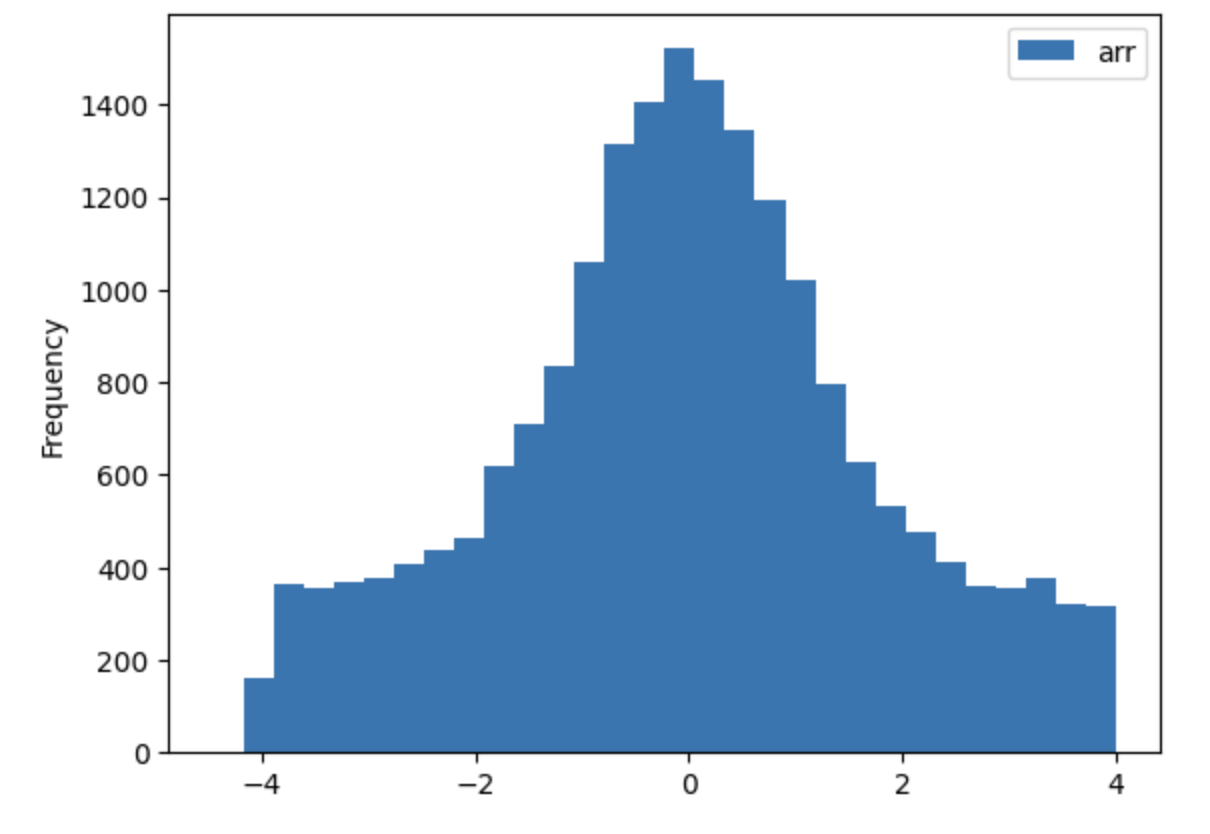

In [3]:
from IPython.display import Image
Image("histogram.png")

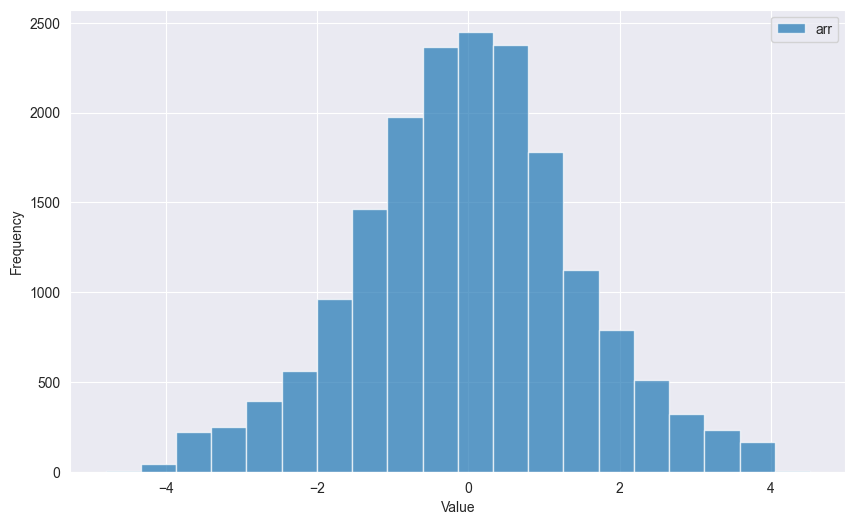

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 0 = mean, 1.2 = std
normal_data = np.random.normal(0, 1.2, 15000)
# -4 low, 4 high
uniform_data = np.random.uniform(-4, 4, 3000)

arr = np.concatenate([normal_data, uniform_data])

plt.figure(figsize=(10, 6))
plt.hist(arr, bins=20, alpha=0.7, label='arr')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

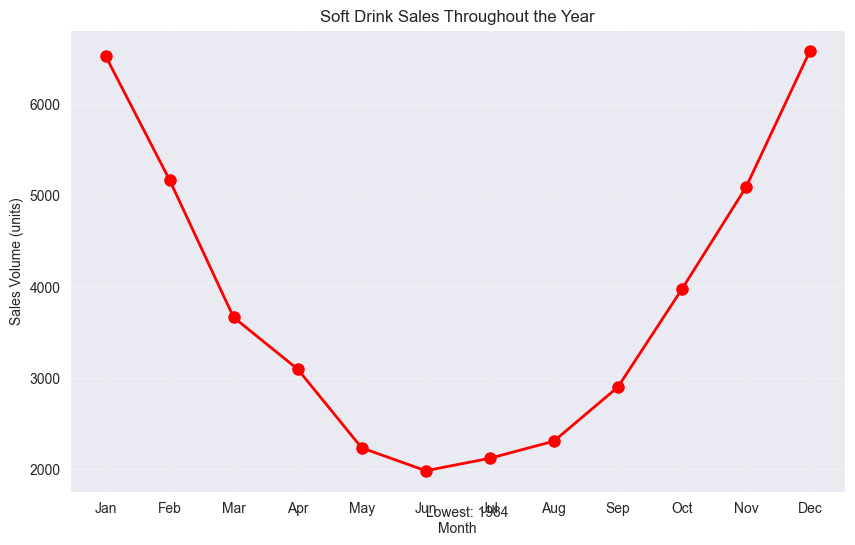

In [40]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

base_sales = 2000 + 150 * (months - 6.5)**2

noise = np.random.normal(0, 100, 12)
sales = base_sales + noise

plt.figure(figsize=(10, 6))
plt.plot(months, sales, 'r-o', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Sales Volume (units)')
plt.title('Soft Drink Sales Throughout the Year')
plt.xticks(months, month_names)
plt.grid(True, alpha=0.3)

min_month = np.argmin(sales) + 1
plt.annotate(f'Lowest: {sales[min_month-1]:.0f}',
             xy=(min_month, sales[min_month-1]),
             xytext=(min_month, sales[min_month-1]-500))

plt.show()

Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

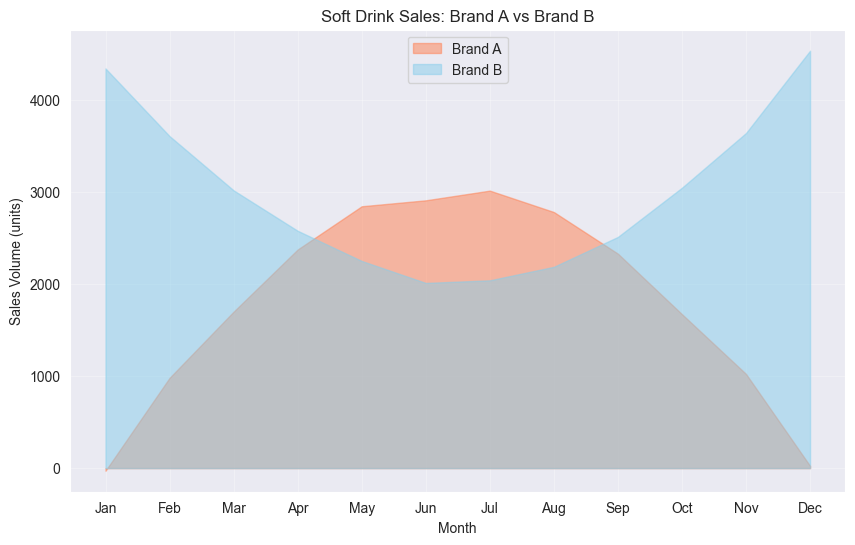

In [41]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

brand_a = 3000 - 100 * (months - 6.5)**2 + np.random.normal(0, 50, 12)
brand_b = 2000 + 80 * (months - 6.5)**2 + np.random.normal(0, 50, 12)

plt.figure(figsize=(10, 6))
plt.fill_between(months, 0, brand_a, alpha=0.5, color='coral', label='Brand A')
plt.fill_between(months, 0, brand_b, alpha=0.5, color='skyblue', label='Brand B')

plt.xlabel('Month')
plt.ylabel('Sales Volume (units)')
plt.title('Soft Drink Sales: Brand A vs Brand B')
plt.xticks(months, month_names)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

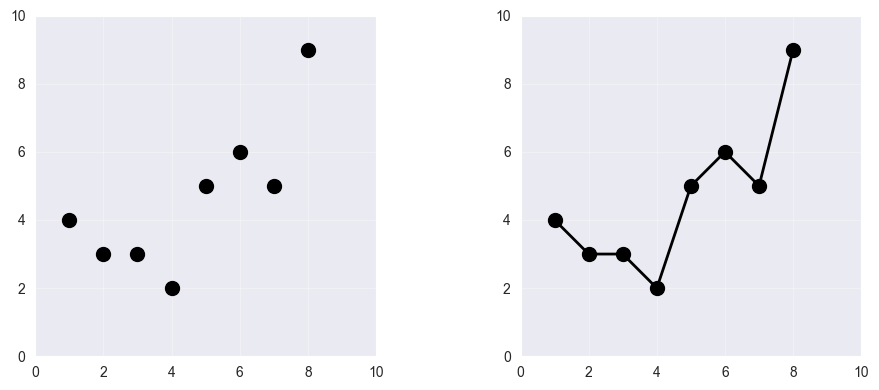

In [51]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [4, 3, 3, 2, 5, 6, 5, 9]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(x, y, s=100, c='black')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

ax2.plot(x, y, 'o-', color='black', markersize=10, linewidth=2)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()